# Probability Questions 0 (from your excellent TA Morris)

1. How does the estimation procedure called for finding the optimal parameter value(s) of a model given data work? 

2. What are good working definitions for the likelihood and prior? 

<!--
    1. The terms "data" and "parameters" or "model" might be useful in the likelihood definition
    2. The terms "probability" or "belief" might be useful in the prior definition
-->
3. What does introducing a prior mean in terms of choosing a model and its parameters?

4. What is "certainty" or "level of belief" in how do you express it?

# Probability Questions 1

---

1. Estimate $\Pr(a \leq X \leq b)$ for $X \sim \textrm{beta}(\alpha,\beta)$ by sampling from a beta distribution 
2. Express this statement as an expectation with $f(x)$ the beta density in question 


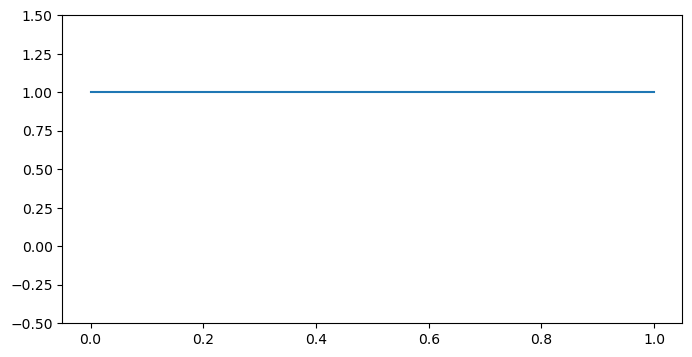

In [1]:
from scipy import stats
import numpy as np; import matplotlib.pyplot as plt

alpha,beta = 1,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

plt.figure(figsize=(8,4)); plt.ylim([-0.5,1.5])
plt.plot(parameter_domain, prior.pdf(parameter_domain));

In [48]:
prior.cdf(.2)

0.2

In [7]:
m = 10000
(prior.rvs(m)<0.2).mean()


0.02

## Monte Carlo Integration
### All Bayesian estimates are just Monte Carlo Integration...

$$
\Large
\begin{align*}
\Pr(a\leq X\leq b)  {} = & \int_a^b f(x) dx \\
{} = & \int 1_{[a,b]}(x) f(x) dx = \mathrm{I\!E}[1_{[a,b]}(x_i)]\\
& \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;\;\;\approx \frac{1}{n} \sum_{i=1}^n 1_{[a,b]}(x_i)
\end{align*}
$$


In [53]:
(prior.rvs(m)<0.2).std()/m**0.5

0.0039818869898579495

# Diversion 1: Likelihoods

---


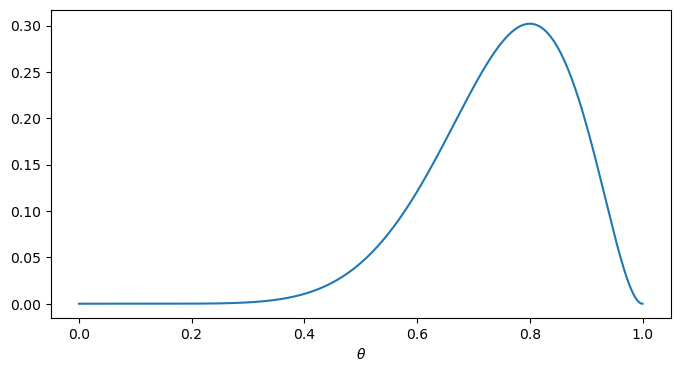

In [2]:
n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda theta: stats.binom.pmf(n=n, k=x, p=theta)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, likelihood(parameter_domain));

# Diversion 2: Posteriors

---

$$
\Large
\begin{align*}
\overset{posterior}{p(\theta|x)} &={} \frac{\overset{likelihood}{p(x|\theta)}\times \overset{prior}{p(\theta)}}{\overset{\text{evidence}}{p(x)}}\\
\end{align*}
$$

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**


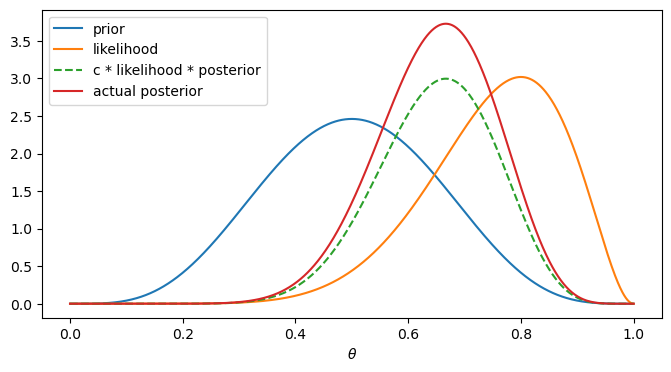

In [3]:
plt.figure(figsize=(8,4))

alpha,beta = 5,5; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

plt.plot(parameter_domain, prior.pdf(parameter_domain), 
         label='prior')

n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda p: stats.binom.pmf(n=n, k=x, p=p)

c = 10
plt.plot(parameter_domain, c*likelihood(parameter_domain),
         label='likelihood')
plt.plot(parameter_domain, 
         c*likelihood(parameter_domain)*prior.pdf(parameter_domain),
         label='c * likelihood * posterior', linestyle="--")

posterior = stats.beta(a=alpha+x,b=beta+n-x)

plt.plot(parameter_domain, posterior.pdf(parameter_domain), 
         label='actual posterior')

plt.legend(); plt.xlabel('$\\theta$');

# Probability Questions 2

---

1. Estimate $\Pr(a \leq p \leq b | x)$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ based on sampling 
2. What values for $a$ and $b$ solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$?
3. What is your best guess of the values for $a$ and $b$ that solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ if you only have a sample from the beta distribution?


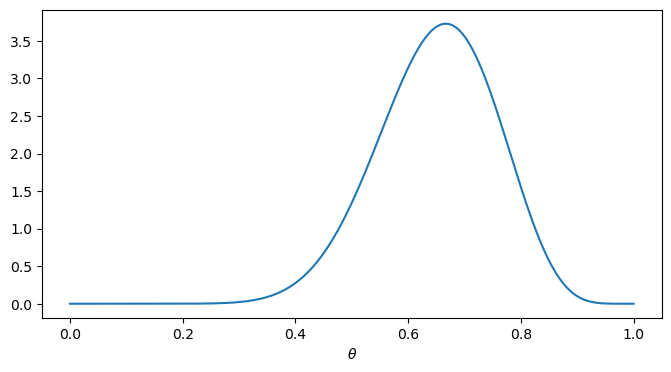

In [4]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
posterior = stats.beta(a=alpha+x, b=beta+n-x)
plt.plot(parameter_domain, posterior.pdf(parameter_domain));


In [8]:
posterior_m = posterior.rvs(m)
sorted(posterior_m)[int(m/40)], sorted(posterior_m)[-int(m/40)]


(0.4337071605974434, 0.8361063962515201)

## Bayesian Credible Interval
$$\Large
\begin{align*}
\underset{\text{e.g., $\alpha=0.05$}}{(1-\alpha)} &\approx{} \int_a^b  p(\theta|x) d\theta \\ & {} \quad \quad  \text{ for } \quad \underset{\text{where $\theta_{(k)}$ is the $k^{th}$ rank ordered posterior sample}}{a=\theta_{\left(\left\lfloor m\times\frac{\alpha}{2}\right\rfloor\right)} \text{ and } b=\theta_{\left(\left\lceil m\times(1-\frac{\alpha}{2})\right\rceil\right)}}
\end{align*}
$$

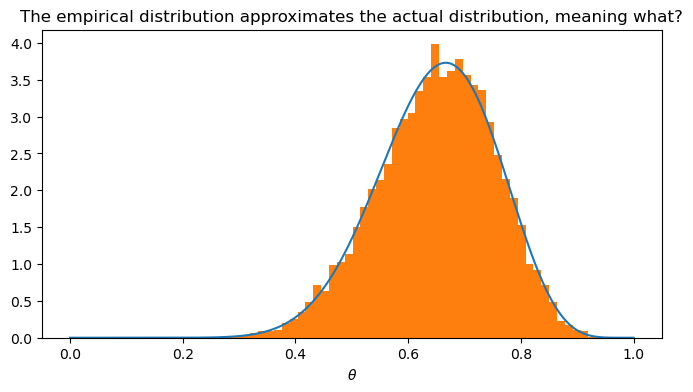

In [9]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.title("The empirical distribution approximates the actual distribution, meaning what?")
plt.plot(parameter_domain, posterior.pdf(parameter_domain));
hist = plt.hist(posterior_m, bins=50, density=True)

#plt.vlines([sorted(posterior_m)[int(m/40)],
#            sorted(posterior_m)[-int(m/40)]],0,hist[0].max()); 

5. What does the fact that the empirical distribution approximates the actual distribution allow us to do?
6. Why might this be useful?
7. How is this different than calculating probabilities?
8. Why is Bayesian inference different from Frequentist inference?


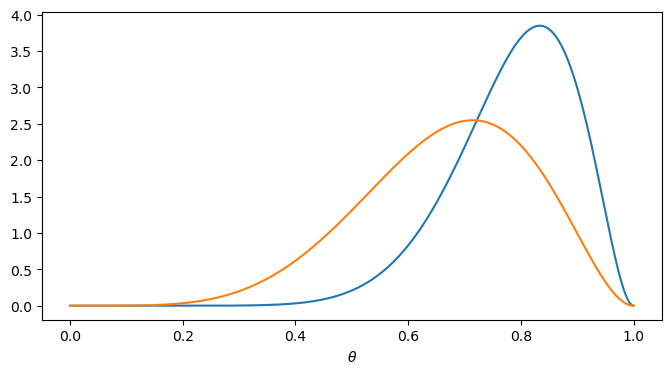

In [10]:
alpha,beta = 3,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

n1,x1 = 10,8  
posterior1 = stats.beta(a=alpha+x1,b=beta+n1-x1)
n2,x2 = 5,3  
posterior2 = stats.beta(a=alpha+x2,b=beta+n2-x2)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, posterior1.pdf(parameter_domain))
plt.plot(parameter_domain, posterior2.pdf(parameter_domain));


9. What is $\Pr(\theta_1<\theta_2|x1,x2) = \int\int 1_{\theta_1 < \theta_2}(\theta_1, \theta_2) p(\theta_1|x1)p(\theta_2|x2) d \theta_1 d \theta_2$?
10. What is the chance that a single sample $\theta_1^{(m)}$ is less than another single sample $\theta_2^{(m)}$?
11. What is the density $f(\theta_1 \div \theta_2)$

# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

Answer is in the q2 cell.

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

**Independent Beta-Binomial: each experiment tests only one version, updating Bernoulli success/failure for that arm. Each arm remains independent.
Single Dirichlet-Multinomial: one trial generates a “multi-category” outcome (e.g., voting, survey, choose exactly one among three), so you update a single Dirichlet distribution for all categories.
Most online A/B tests fall under the first scenario (each user only sees one version, not one out of three simultaneously), so independent Beta-Binomial is more appropriate and is also the most common approach for multi-armed bandit problems.**

Code is in the q3 cell.

In [ ]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    # use these for batch updates based on a binomial distribution
    
    # or do updates in a truly sequential manner using Bernoulli
    posterior = prior * (parameter_domain ** observation) * ((1 - parameter_domain) ** (1 - observation))
    posterior /= posterior.sum()

    plt.scatter(parameter_domain, posterior, 
                label=f"posterior (n={n} x={x})")
    # prior = posterior  # for each Bernoulli observation update
    prior = posterior
    # plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend()
plt.show() ;

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data

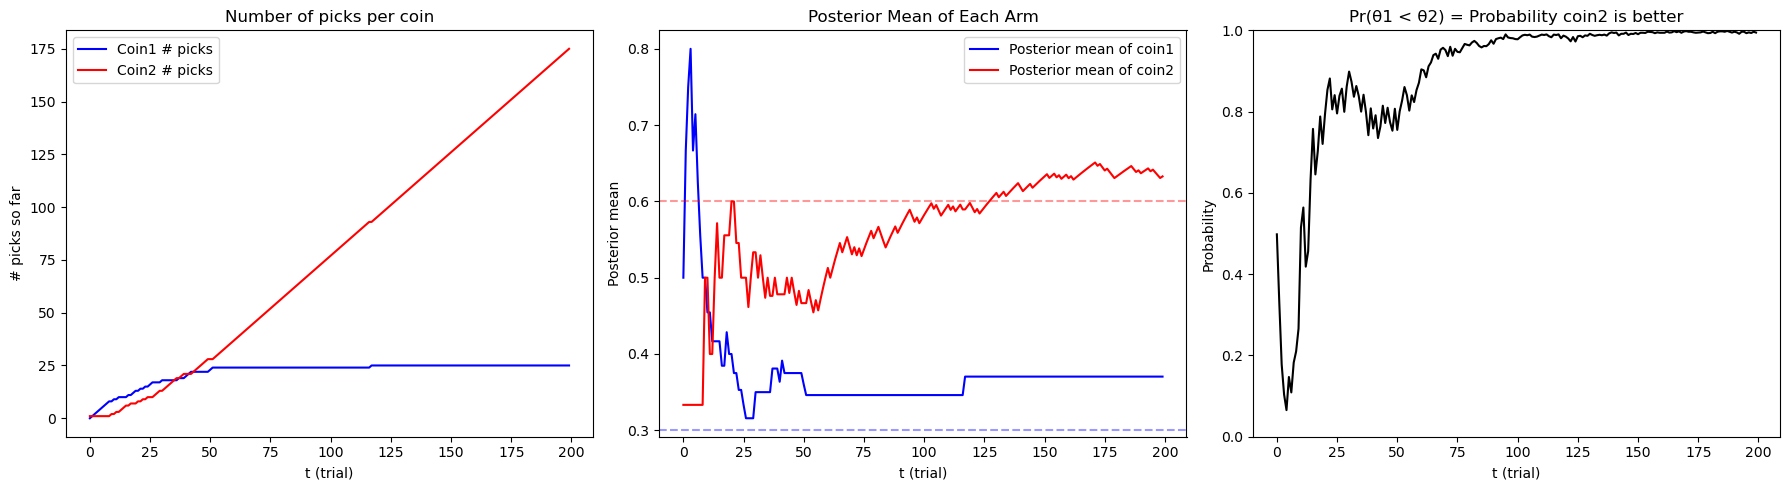

Final # picks -> coin1: 25, coin2: 175
Final posterior mean for coin1: 0.370
Final posterior mean for coin2: 0.633


In [3]:
# Q2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def prob_theta1_less_theta2(alpha1, beta1, alpha2, beta2, nsamps=10_000):
    """
    Approximate Pr(θ1 < θ2) by Monte Carlo:
      θ1 ~ Beta(alpha1, beta1)
      θ2 ~ Beta(alpha2, beta2)
    Return fraction of samples where θ1 < θ2.
    """
    # Draw random samples from each posterior
    samples1 = np.random.beta(alpha1, beta1, nsamps)
    samples2 = np.random.beta(alpha2, beta2, nsamps)
    return np.mean(samples1 < samples2)


# --------------------------------------------------
# True coin probabilities (unknown to the algorithm)
# --------------------------------------------------
theta_true_1 = 0.30
theta_true_2 = 0.60

# --------------------------------------------------
# Initialize Beta(1,1) priors => uniform for each arm
# --------------------------------------------------
alpha1, beta1 = 1.0, 1.0
alpha2, beta2 = 1.0, 1.0

# We'll track counts n_j (# flips) and x_j (# successes) for each coin
n1, x1 = 0, 0
n2, x2 = 0, 0

# How many total trials
m = 200

# For plotting, we’ll store some metrics each round:
picks_coin1 = []
picks_coin2 = []
posterior_mean_1 = []
posterior_mean_2 = []
prob_coin2_better = []

for t in range(m):
    # Step 1: Compute Probability(θ1 < θ2) from current posterior
    p_theta2_better = prob_theta1_less_theta2(alpha1 + x1, beta1 + (n1 - x1),
                                              alpha2 + x2, beta2 + (n2 - x2),
                                              nsamps=2000)
    
    # Step 2: Decide which coin to flip
    # With probability p_theta2_better, pick coin2, else coin1
    if np.random.rand() < p_theta2_better:
        # Flip coin2
        n2 += 1
        result = (np.random.rand() < theta_true_2)  # success/fail
        x2 += result
        picks_coin1.append(n1)
        picks_coin2.append(n2)
    else:
        # Flip coin1
        n1 += 1
        result = (np.random.rand() < theta_true_1)
        x1 += result
        picks_coin1.append(n1)
        picks_coin2.append(n2)
    
    # Record posterior means (for plotting)
    mean1 = (alpha1 + x1)/(alpha1 + beta1 + n1)
    mean2 = (alpha2 + x2)/(alpha2 + beta2 + n2)
    posterior_mean_1.append(mean1)
    posterior_mean_2.append(mean2)
    
    # Also store the probability that coin2 is better
    prob_coin2_better.append(p_theta2_better)

# --------------------------------------------------
# Visualization
# --------------------------------------------------
fig, ax = plt.subplots(1, 3, figsize=(18,5))

# 1) How many times each coin was chosen at each trial
ax[0].plot(range(m), picks_coin1, label="Coin1 # picks", color='blue')
ax[0].plot(range(m), picks_coin2, label="Coin2 # picks", color='red')
ax[0].set_xlabel("t (trial)")
ax[0].set_ylabel("# picks so far")
ax[0].set_title("Number of picks per coin")
ax[0].legend()

# 2) Posterior mean estimate for each coin
ax[1].plot(range(m), posterior_mean_1, label="Posterior mean of coin1", color='blue')
ax[1].plot(range(m), posterior_mean_2, label="Posterior mean of coin2", color='red')
ax[1].axhline(y=theta_true_1, color='blue', linestyle='--', alpha=0.4)
ax[1].axhline(y=theta_true_2, color='red', linestyle='--', alpha=0.4)
ax[1].set_xlabel("t (trial)")
ax[1].set_ylabel("Posterior mean")
ax[1].set_title("Posterior Mean of Each Arm")
ax[1].legend()

# 3) Probability that coin2 is better
ax[2].plot(range(m), prob_coin2_better, color='black')
ax[2].set_ylim([0,1])
ax[2].set_xlabel("t (trial)")
ax[2].set_ylabel("Probability")
ax[2].set_title("Pr(θ1 < θ2) = Probability coin2 is better")

plt.tight_layout()
plt.show()

print(f"Final # picks -> coin1: {n1}, coin2: {n2}")
print(f"Final posterior mean for coin1: {posterior_mean_1[-1]:.3f}")
print(f"Final posterior mean for coin2: {posterior_mean_2[-1]:.3f}")


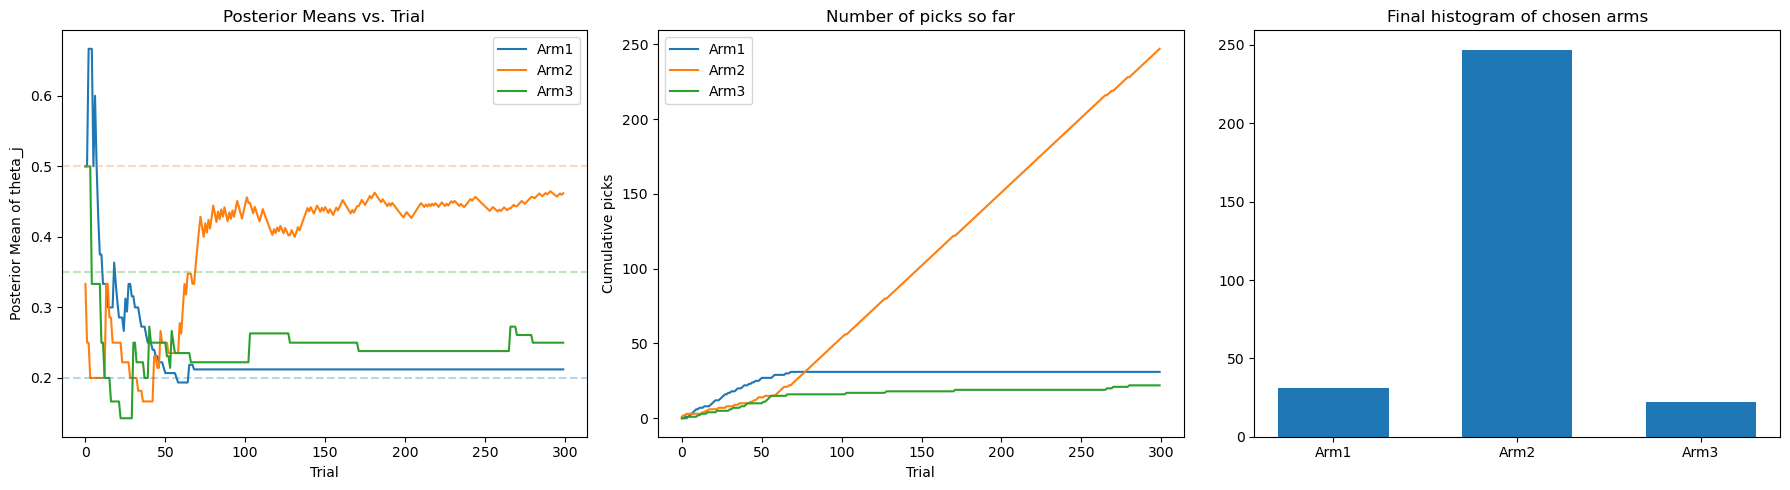

Final picks: [31, 247, 22]
Final successes: [6, 114, 5]
Arm1: posterior mean = 0.212, true=0.2
Arm2: posterior mean = 0.462, true=0.5
Arm3: posterior mean = 0.250, true=0.35


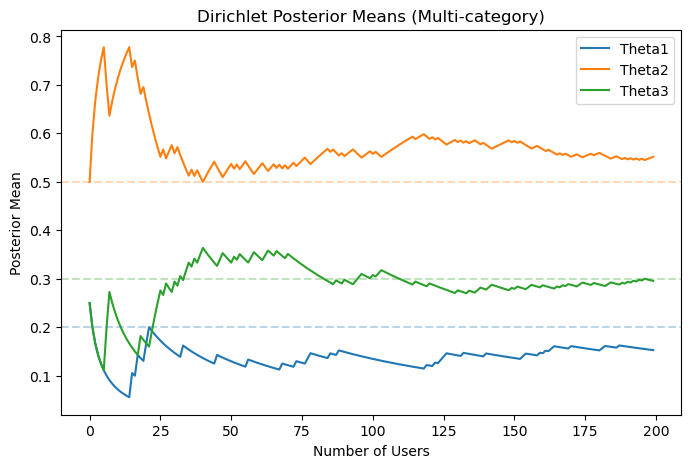

Final observed counts (x1,x2,x3) = [ 30 111  59]
Final posterior parameters alpha_post = [ 31. 112.  60.]
Final posterior means = [0.15270936 0.55172414 0.2955665 ]


In [1]:
#q3 beta-binomial
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# True success probabilities (unknown to the algorithm)
theta_true = [0.2, 0.5, 0.35]  # e.g. Arm1=0.2, Arm2=0.5, Arm3=0.35

# Number of arms
K = 3

# Initialize Beta(1,1) for each arm => uniform prior
# We'll track n_j (# plays) and x_j (# successes) for each arm
alpha_prior = [1.0]*K
beta_prior  = [1.0]*K
n = [0]*K
x = [0]*K

# Helper: sample from each arm's posterior & pick the largest
def thompson_sampling_pick_arm():
    sampled_thetas = []
    for j in range(K):
        # Posterior Beta(alpha + x_j, beta + (n_j - x_j))
        a_post = alpha_prior[j] + x[j]
        b_post = beta_prior[j]  + (n[j] - x[j])
        sampled_thetas.append(np.random.beta(a_post, b_post))
    # Pick the arm with the highest sampled theta
    return np.argmax(sampled_thetas)

# Main loop: how many total trials
m = 300

# Storage for plots
chosen_arm_history  = []
posterior_means     = [[] for _ in range(K)]
arm_pick_counts     = [[] for _ in range(K)]

for t in range(m):
    # Decide which arm to play
    chosen_arm = thompson_sampling_pick_arm()
    chosen_arm_history.append(chosen_arm)

    # Simulate one Bernoulli trial with that arm's true success prob
    reward = (np.random.rand() < theta_true[chosen_arm])
    
    # Update n_j, x_j for that chosen arm
    n[chosen_arm] += 1
    x[chosen_arm] += reward
    
    # Record posterior means
    for j in range(K):
        a_post = alpha_prior[j] + x[j]
        b_post = beta_prior[j]  + (n[j] - x[j])
        posterior_means[j].append(a_post / (a_post + b_post))
    
    # Record how many times each arm was picked so far
    for j in range(K):
        arm_pick_counts[j].append(n[j])

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# (1) Posterior means over time
for j in range(K):
    axes[0].plot(range(m), posterior_means[j], label=f"Arm{j+1}")
for j, th in enumerate(theta_true):
    axes[0].axhline(y=th, color=f"C{j}", linestyle='--', alpha=0.3)
axes[0].set_title("Posterior Means vs. Trial")
axes[0].set_xlabel("Trial")
axes[0].set_ylabel("Posterior Mean of theta_j")
axes[0].legend()

# (2) Count how many times each arm was chosen
for j in range(K):
    axes[1].plot(range(m), arm_pick_counts[j], label=f"Arm{j+1}")
axes[1].set_title("Number of picks so far")
axes[1].set_xlabel("Trial")
axes[1].set_ylabel("Cumulative picks")
axes[1].legend()

# (3) Histogram of chosen arms overall
axes[2].hist(chosen_arm_history, bins=np.arange(K+1)-0.5, rwidth=0.6)
axes[2].set_xticks([0,1,2])
axes[2].set_xticklabels(["Arm1","Arm2","Arm3"])
axes[2].set_title("Final histogram of chosen arms")

plt.tight_layout()
plt.show()

print("Final picks:", n)
print("Final successes:", x)
for j in range(K):
    print(f"Arm{j+1}: posterior mean = {posterior_means[j][-1]:.3f}, true={theta_true[j]}")

#q3 single Dirichlet-multinomial
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

# Suppose: a user chooses one of A, B, C with probabilities p_true = (0.2, 0.5, 0.3)
p_true = np.array([0.2, 0.5, 0.3])
K = 3

# Initial Dirichlet(1,1,1) prior
alpha_vec = np.array([1., 1., 1.])  # (alpha_1, alpha_2, alpha_3)
x_counts = np.array([0, 0, 0])      # Observed counts for categories (1,2,3)

m = 200  # Total number of users = 200

posterior_means = []

for t in range(m):
    # Each user picks exactly one category (A,B,C) according to p_true
    choice = np.random.choice(K, p=p_true)
    x_counts[choice] += 1
    
    # Posterior parameters = (alpha_1 + x1, alpha_2 + x2, alpha_3 + x3)
    alpha_post = alpha_vec + x_counts
    
    # Posterior mean for each component j = alpha_post[j] / sum(alpha_post)
    post_mean = alpha_post / alpha_post.sum()
    posterior_means.append(post_mean.copy())

posterior_means = np.array(posterior_means)

# Visualization
plt.figure(figsize=(8,5))
for j in range(K):
    plt.plot(posterior_means[:, j], label=f"Theta{j+1}")

# Plot the true probabilities for reference
for j, val in enumerate(p_true):
    plt.axhline(val, color=f"C{j}", linestyle='--', alpha=0.3)
    
plt.title("Dirichlet Posterior Means (Multi-category)")
plt.xlabel("Number of Users")
plt.ylabel("Posterior Mean")
plt.legend()
plt.show()

print("Final observed counts (x1,x2,x3) =", x_counts)
print("Final posterior parameters alpha_post =", alpha_post)
print("Final posterior means =", alpha_post / alpha_post.sum())
